# Exploring Dataset

This is a notebook to explore the dataset created 

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dtale
from master_thesis.config import PROCESSED_DATA_DIR, load_dataframe_from_pickle

In [9]:
annotated_and_targeted_hatespeech_df = load_dataframe_from_pickle(
    PROCESSED_DATA_DIR / "annotated_and_targeted_hatespeech.pkl"
)

display(annotated_and_targeted_hatespeech_df.head(5))

,id_new,text,extracted_target,label_hatespeech_binary_offensive_not_included,label_hatespeech_binary_offensive_included,label_normal_offensive_hatespeech,platform,original_dataset_title,original_id,original_label,original_target
0,1,i dont think im getting my baby them white 9 h...,{none},not_hatespeech,normal,normal,twitter,HateXplain,1179055004553900032,normal,[None]
1,2,we cannot continue calling ourselves feminists...,{none},not_hatespeech,normal,normal,twitter,HateXplain,1179063826874032128,normal,[None]
2,3,nawt yall niggers ignoring me,{race},not_hatespeech,normal,normal,twitter,HateXplain,1178793830532956161,normal,[African]
3,4,<user> i am bit confused coz chinese ppl can n...,{race},hatespeech,hatespeech/offensive,hatespeech,twitter,HateXplain,1179088797964763136,hatespeech,[Asian]
4,5,this bitch in whataburger eating a burger with...,"{gender, race}",hatespeech,hatespeech/offensive,hatespeech,twitter,HateXplain,1179085312976445440,hatespeech,"[Caucasian, Women]"


In [31]:
print(annotated_and_targeted_hatespeech_df.shape) 
print(annotated_and_targeted_hatespeech_df.info())

(65217, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65217 entries, 0 to 65216
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   id_new                                          65217 non-null  int64   
 1   text                                            65217 non-null  object  
 2   extracted_target                                65217 non-null  object  
 3   label_hatespeech_binary_offensive_not_included  65217 non-null  category
 4   label_hatespeech_binary_offensive_included      65217 non-null  category
 5   label_normal_offensive_hatespeech               65217 non-null  category
 6   platform                                        65217 non-null  category
 7   original_dataset_title                          65217 non-null  category
 8   original_id                                     65217 non-null  object  
 9   original_label  

In [32]:
annotated_and_targeted_hatespeech_df.describe()

,id_new
count,65217.00000
mean,32609.00000
std,18826.67059
min,1.00000
25%,16305.00000
50%,32609.00000
75%,48913.00000
max,65217.00000


In [33]:
annotated_and_targeted_hatespeech_df.isnull().sum()

id_new                                            0
text                                              0
extracted_target                                  0
label_hatespeech_binary_offensive_not_included    0
label_hatespeech_binary_offensive_included        0
label_normal_offensive_hatespeech                 0
platform                                          0
original_dataset_title                            0
original_id                                       0
original_label                                    0
original_target                                   0
dtype: int64

In [10]:
annotated_and_targeted_hatespeech_df.dtypes

id_new                                               int64
text                                                object
extracted_target                                    object
label_hatespeech_binary_offensive_not_included    category
label_hatespeech_binary_offensive_included        category
label_normal_offensive_hatespeech                 category
platform                                          category
original_dataset_title                            category
original_id                                         object
original_label                                    category
original_target                                     object
dtype: object

In [37]:
columns = ['extracted_target', 'label_hatespeech_binary_offensive_not_included', 'label_hatespeech_binary_offensive_included'
          , 'label_normal_offensive_hatespeech', 'platform', 'original_dataset_title']

In [41]:
for col in columns:
    print(f'\nColumn: {col}')
    print(annotated_and_targeted_hatespeech_df[col].value_counts())



Column: extracted_target
extracted_target
{gender}                                         11085
{race}                                            9798
{none}                                            7685
{religion}                                        7219
{sexuality}                                       5855
                                                 ...  
{disability, religion, gender, race}                 1
{gender, sexuality, nationality, race, other}        1
{disability, sexuality, religion, gender}            1
{other, nationality, religion, gender}               1
{other, disability, nationality, race}               1
Name: count, Length: 101, dtype: int64

Column: label_hatespeech_binary_offensive_not_included
label_hatespeech_binary_offensive_not_included
not_hatespeech    50256
hatespeech        14961
Name: count, dtype: int64

Column: label_hatespeech_binary_offensive_included
label_hatespeech_binary_offensive_included
normal                  38135
hatespeech/

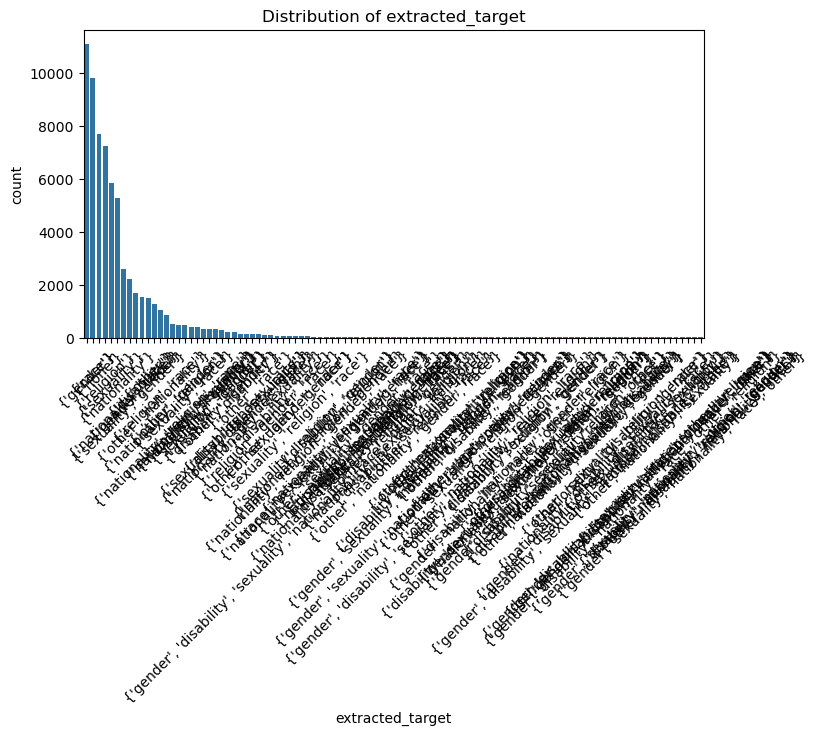

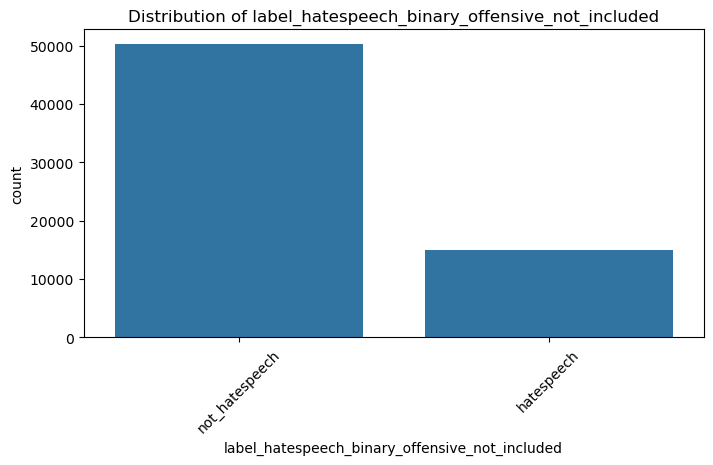

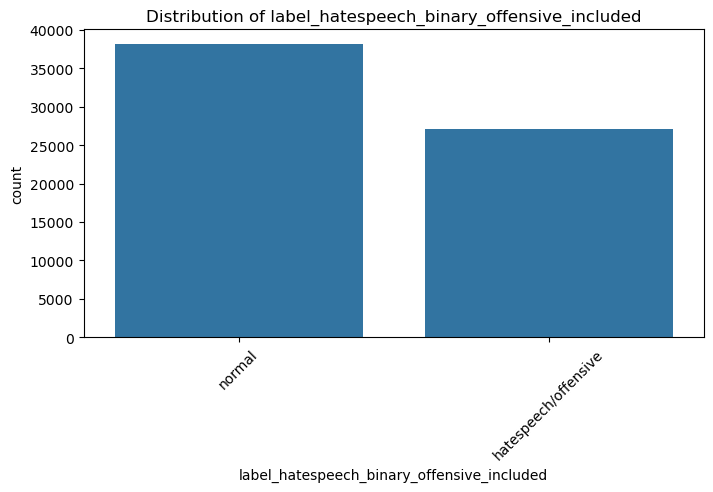

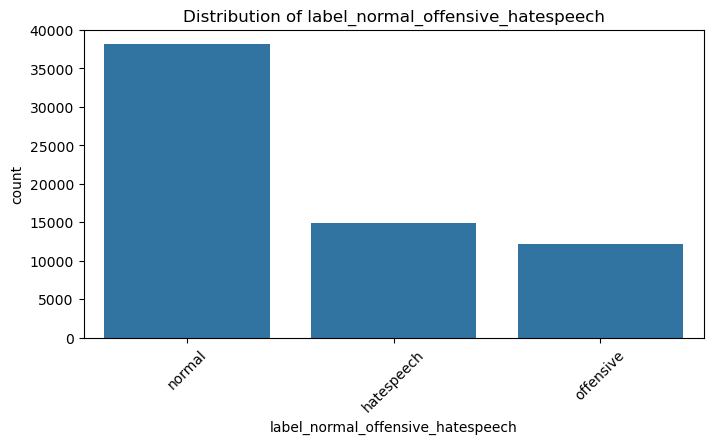

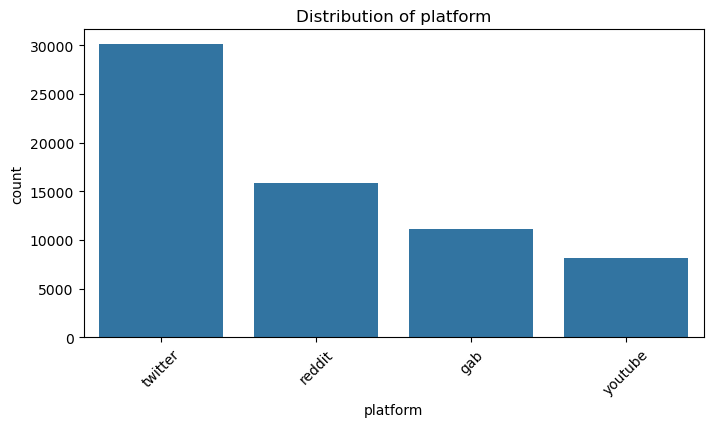

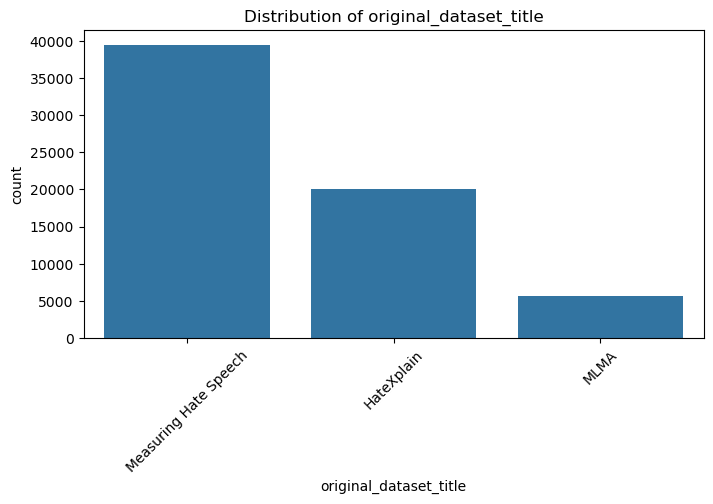

In [42]:
for col in columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=annotated_and_targeted_hatespeech_df, order=annotated_and_targeted_hatespeech_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [45]:
d = dtale.show(annotated_and_targeted_hatespeech_df)
d.open_browser()

/tmp/ipykernel_8977/3602893757.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




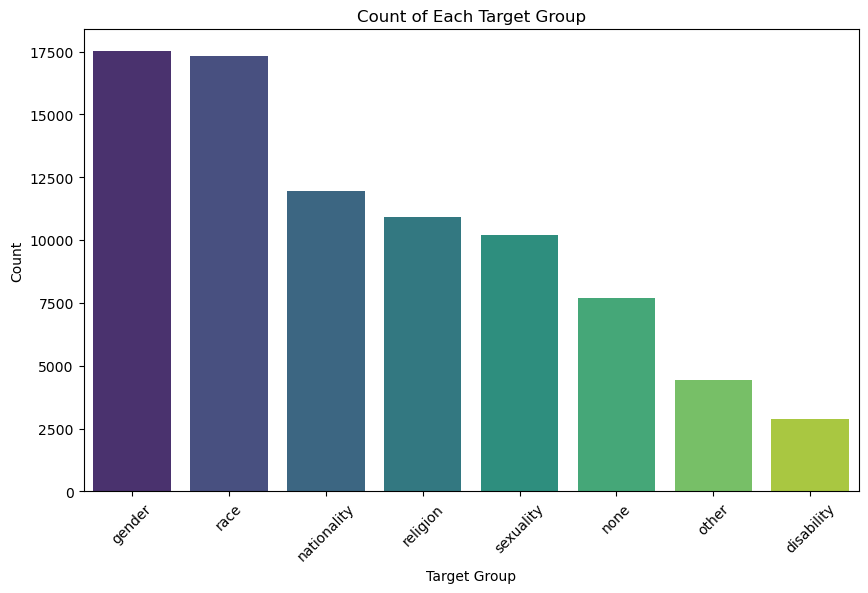

In [46]:
# Explode the 'extracted_target' column (convert sets into individual rows)
exploded_df = annotated_and_targeted_hatespeech_df.explode('extracted_target')

# Count the occurrences of each target group
target_counts = exploded_df['extracted_target'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title("Count of Each Target Group")
plt.xlabel("Target Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [56]:
print(target_counts)
print('Total of target counts for singles:',sum(target_counts))

extracted_target
gender         17506
race           17317
nationality    11966
religion       10929
sexuality      10217
none            7685
other           4423
disability      2885
Name: count, dtype: int64
Total of target counts for singles: 82928


In [70]:
# Filter rows where 'extracted_target' has only one element in the set
single_target_df = annotated_and_targeted_hatespeech_df[
    annotated_and_targeted_hatespeech_df['extracted_target'].apply(lambda x: len(x) == 1)
]

single_target_df['extracted_target'] = single_target_df['extracted_target'].apply(lambda x: list(x)[0])

# Count the occurrences of each target group
target_counts = single_target_df['extracted_target'].value_counts()


/tmp/ipykernel_8977/3123769697.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
target_counts

extracted_target
gender         11085
race            9798
none            7685
religion        7219
sexuality       5855
nationality     5254
disability      1523
other           1478
Name: count, dtype: int64

/tmp/ipykernel_8977/1774179845.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




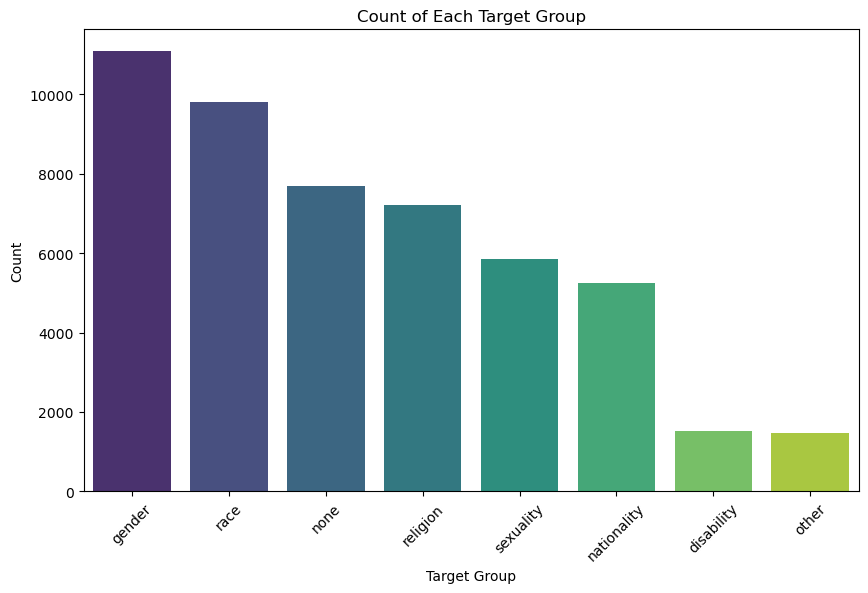

In [ ]:

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title("Count of Each Target Group")
plt.xlabel("Target Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()